In [163]:
import pandas as pd
import re
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
from matplotlib import pyplot as plt

In [164]:
df = pd.read_excel('/Users/tankchaser/Desktop/pr_1_yearequalmonth.xlsx')
df.head(50)

,Name,Category,Region,Company Age,Number of Employees,6 Month Growth,Number of Investors,Supported Languages,Price Availability,Cheapest Monthly Package,...,Freemium,Free Trial,Number of Versions,Segmentation,Per Feature,Per User,One Time,Pay As You Go,Volume-based Price,Fixed Price
0,Practice Ignition,6,3,2,2,86.00,1,1,1,75.00,...,0,1,4,1,1,0,0,0,0,0
1,SketchUp,2,1,3,2,66.67,0,1,1,55.00,...,1,1,10,3,1,0,0,0,0,0
2,Livestorm,2,2,1,1,66.67,0,3,1,109.00,...,1,1,3,1,1,0,0,0,0,0
3,Crelate Talent,6,1,1,1,51.85,0,1,1,95.00,...,0,1,3,1,1,1,0,0,0,0
4,TravelPerk,3,2,1,3,51.29,2,2,1,15.00,...,1,1,3,1,1,0,1,0,1,0
5,CleverTap,1,1,1,3,48.52,0,1,1,200.00,...,0,1,3,1,1,0,0,0,1,0
6,Personio,4,2,1,3,46.72,0,2,0,99.00,...,0,0,3,1,1,0,0,0,0,0
7,Mobiniti,5,1,1,1,45.83,0,1,1,49.00,...,1,1,9,1,1,0,0,1,0,0
8,BugSnag,1,1,1,2,42.50,0,1,1,69.00,...,1,1,3,1,1,0,0,0,1,0
9,GitLab,1,1,1,3,42.11,0,1,1,228.00,...,1,1,3,1,1,1,0,0,0,0


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 31 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Name                                                 545 non-null    object 
 1   Category                                             545 non-null    int64  
 2   Region                                               545 non-null    int64  
 3   Company Age                                          545 non-null    int64  
 4   Number of Employees                                  545 non-null    int64  
 5   6 Month Growth                                       545 non-null    float64
 6   Number of investors                                  545 non-null    int64  
 7   Supported Languages                                  545 non-null    int64  
 8   Price availability  (official site - 1, others - 0)  545 non-null    i

In [191]:
df.describe()

,Category,Region,Company Age,Number of Employees,6 Month Growth,Number of Investors,Supported Languages,Price Availability,Cheapest Monthly Package,Most Expensive Monthly Package,...,Freemium,Free Trial,Number of Versions,Segmentation,Per Feature,Per User,One Time,Pay As You Go,Volume-based Price,Fixed Price
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,...,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.605505,1.231193,1.932110,2.176147,10.463009,0.522936,1.713761,0.855046,968.764176,3548.061908,...,0.306422,0.682569,3.807339,1.649541,0.891743,0.440367,0.027523,0.018349,0.137615,0.011009
std,1.965784,0.516047,0.664886,0.695429,10.873071,0.802069,0.886320,0.352378,4361.510640,25177.100263,...,0.461431,0.465904,2.298005,0.935476,0.310990,0.496887,0.163752,0.134332,0.344812,0.104441
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.070000,0.650000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,1.000000,2.000000,3.120000,0.000000,1.000000,1.000000,15.000000,47.760000,...,0.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,1.000000,2.000000,2.000000,7.210000,0.000000,1.000000,1.000000,54.000000,180.000000,...,0.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,1.000000,2.000000,3.000000,13.990000,1.000000,3.000000,1.000000,240.000000,890.000000,...,1.000000,1.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,3.000000,3.000000,3.000000,86.000000,2.000000,3.000000,1.000000,59690.000000,480000.000000,...,1.000000,1.000000,20.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Проверка данных на пустые значения

In [192]:
df.isnull().sum()

Name                              0
Category                          0
Region                            0
Company Age                       0
Number of Employees               0
6 Month Growth                    0
Number of Investors               0
Supported Languages               0
Price Availability                0
Cheapest Monthly Package          0
Most Expensive Monthly Package    0
Cheapest Yearly Package           0
Most Expensive Yearly Package     0
Price Range                       0
Discount for Smallest Package     0
Discount for Biggest Package      0
Monthly Subscription              0
Yearly Subscription               0
Localization                      0
Customization                     0
Freemium                          0
Free Trial                        0
Number of Versions                0
Segmentation                      0
Per Feature                       0
Per User                          0
One Time                          0
Pay As You Go               

Category Region Company Age	Number of Employees	6 Month Growth	Number of Investors	Supported Languages	Price Availability Cheapest Monthly Package Most Expensive Monthly Package Cheapest Yearly Package Most Expensive Yearly Package Price Range Discount for Smallest Package Discount for Biggest Package Monthly Subscription Yearly Subscription Localization Customization	Freemium Free Trial	Number of Versions Segmentation	Per Feature	Per User One Time	Pay As You Go	Volume-based Price	Fixed Price

In [122]:
import seaborn as sns

array([[<AxesSubplot:title={'center':'Category'}>,
        <AxesSubplot:title={'center':'Region'}>,
        <AxesSubplot:title={'center':'Company Age'}>,
        <AxesSubplot:title={'center':'Number of Employees'}>,
        <AxesSubplot:title={'center':'6 Month Growth'}>],
       [<AxesSubplot:title={'center':'Number of Investors'}>,
        <AxesSubplot:title={'center':'Supported Languages'}>,
        <AxesSubplot:title={'center':'Price Availability'}>,
        <AxesSubplot:title={'center':'Cheapest Monthly Package'}>,
        <AxesSubplot:title={'center':'Most Expensive Monthly Package'}>],
       [<AxesSubplot:title={'center':'Cheapest Yearly Package'}>,
        <AxesSubplot:title={'center':'Most Expensive Yearly Package'}>,
        <AxesSubplot:title={'center':'Price Range'}>,
        <AxesSubplot:title={'center':'Discount for Smallest Package'}>,
        <AxesSubplot:title={'center':'Discount for Biggest Package'}>],
       [<AxesSubplot:title={'center':'Monthly Subscription'}>,
 

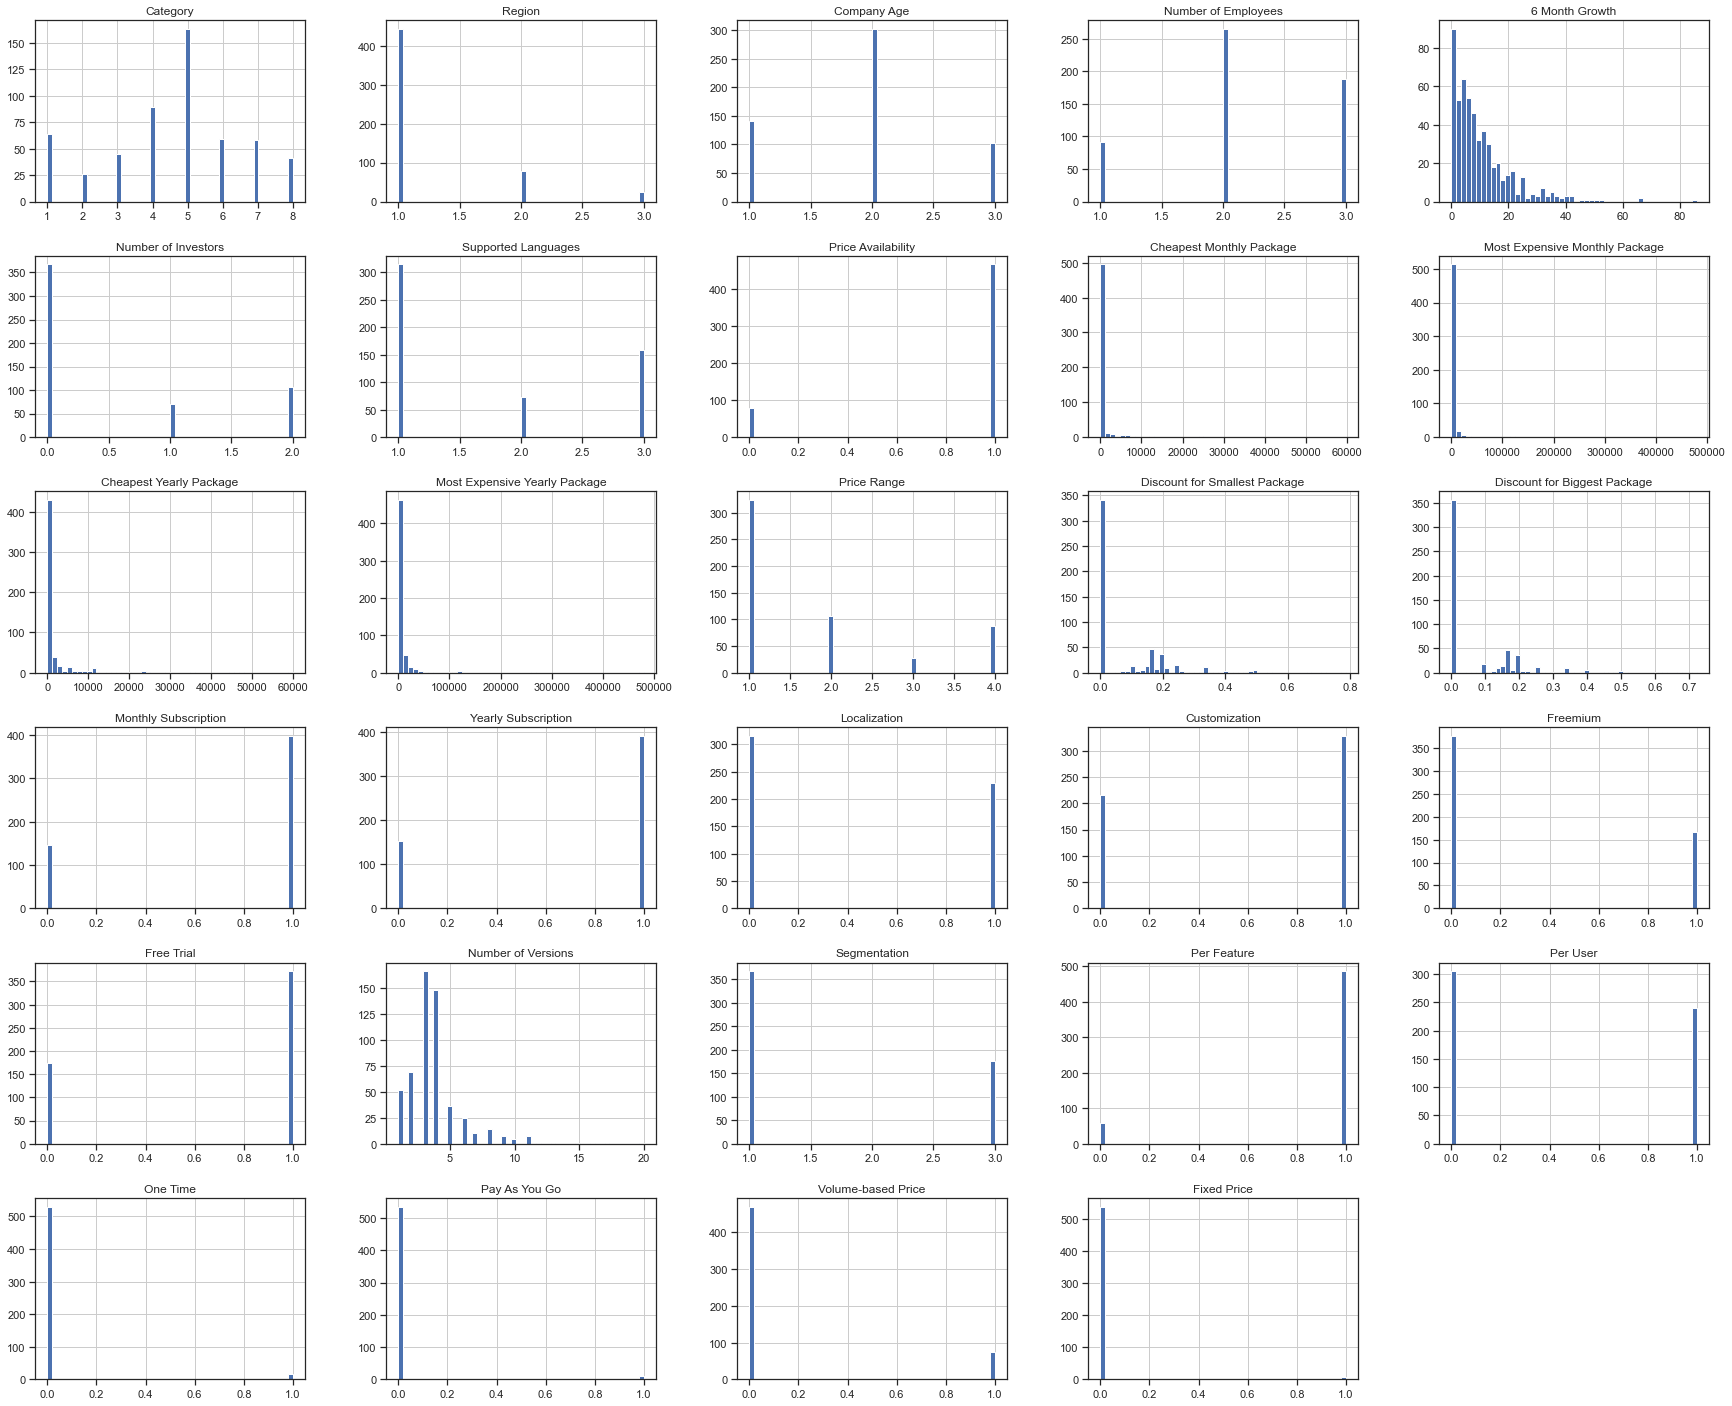

In [193]:
df.hist(bins=50, figsize=(30,25))#графический анализ по частотному графику

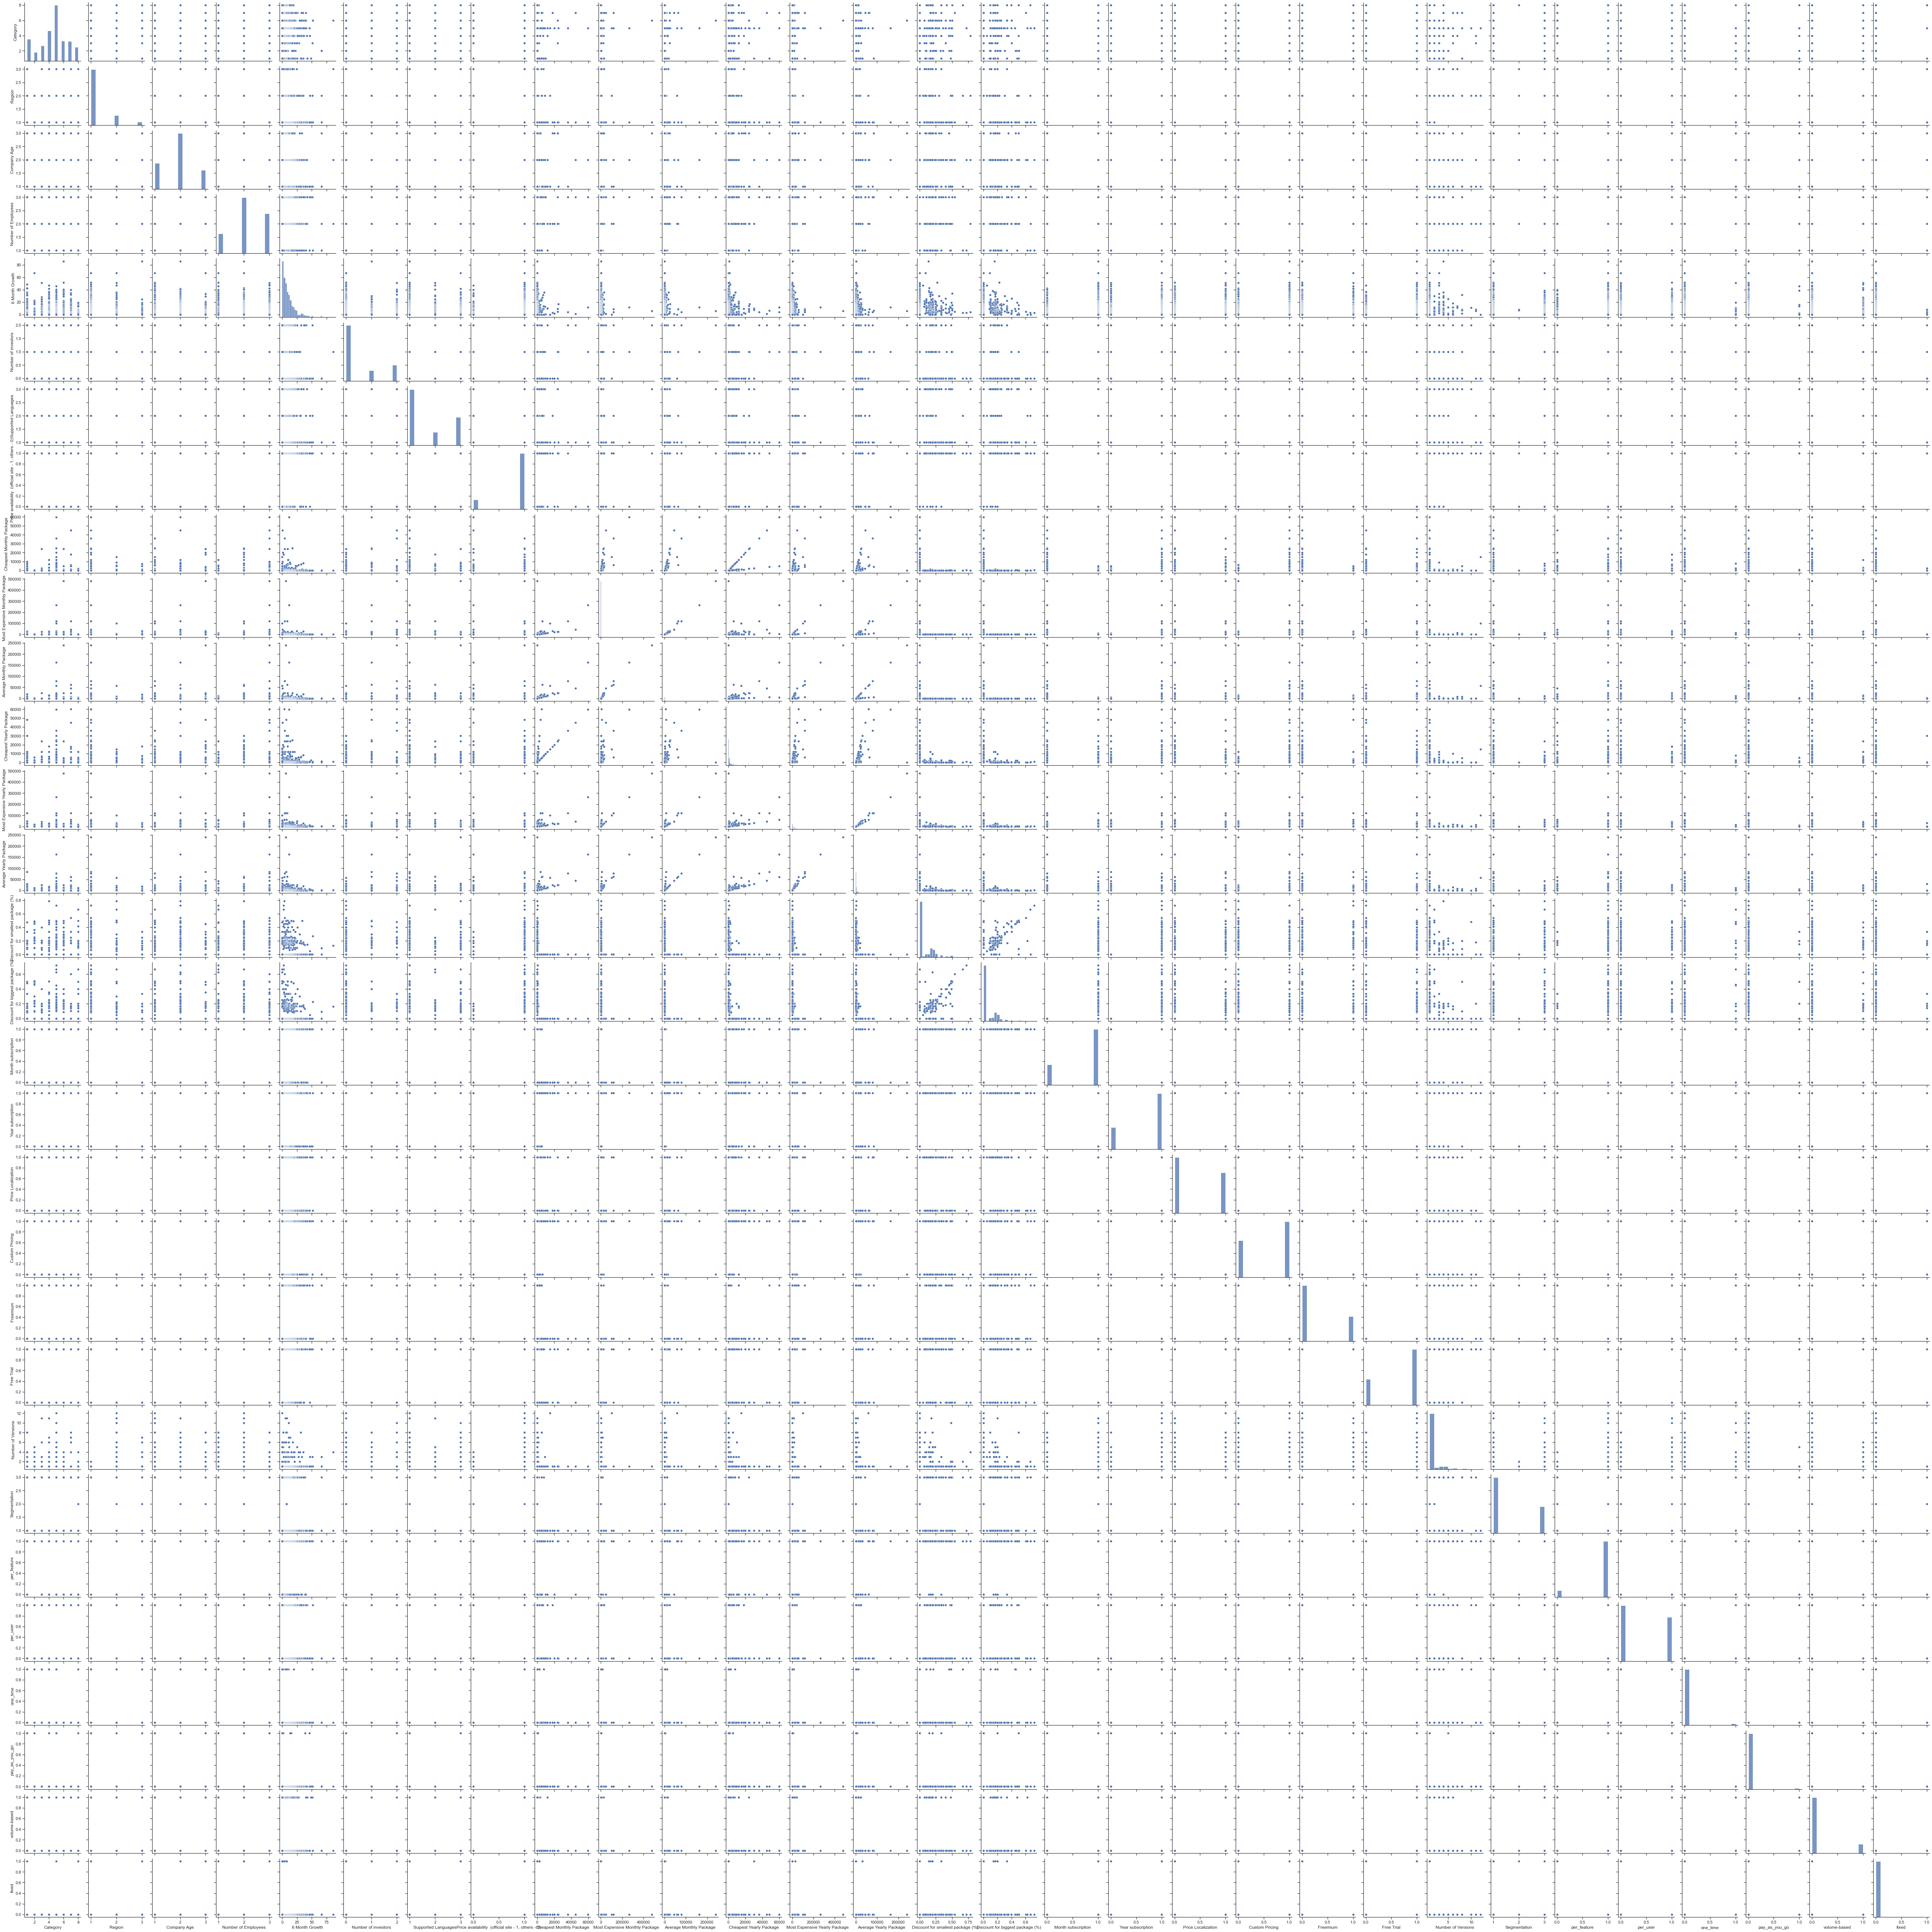

In [128]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df)

<AxesSubplot:>

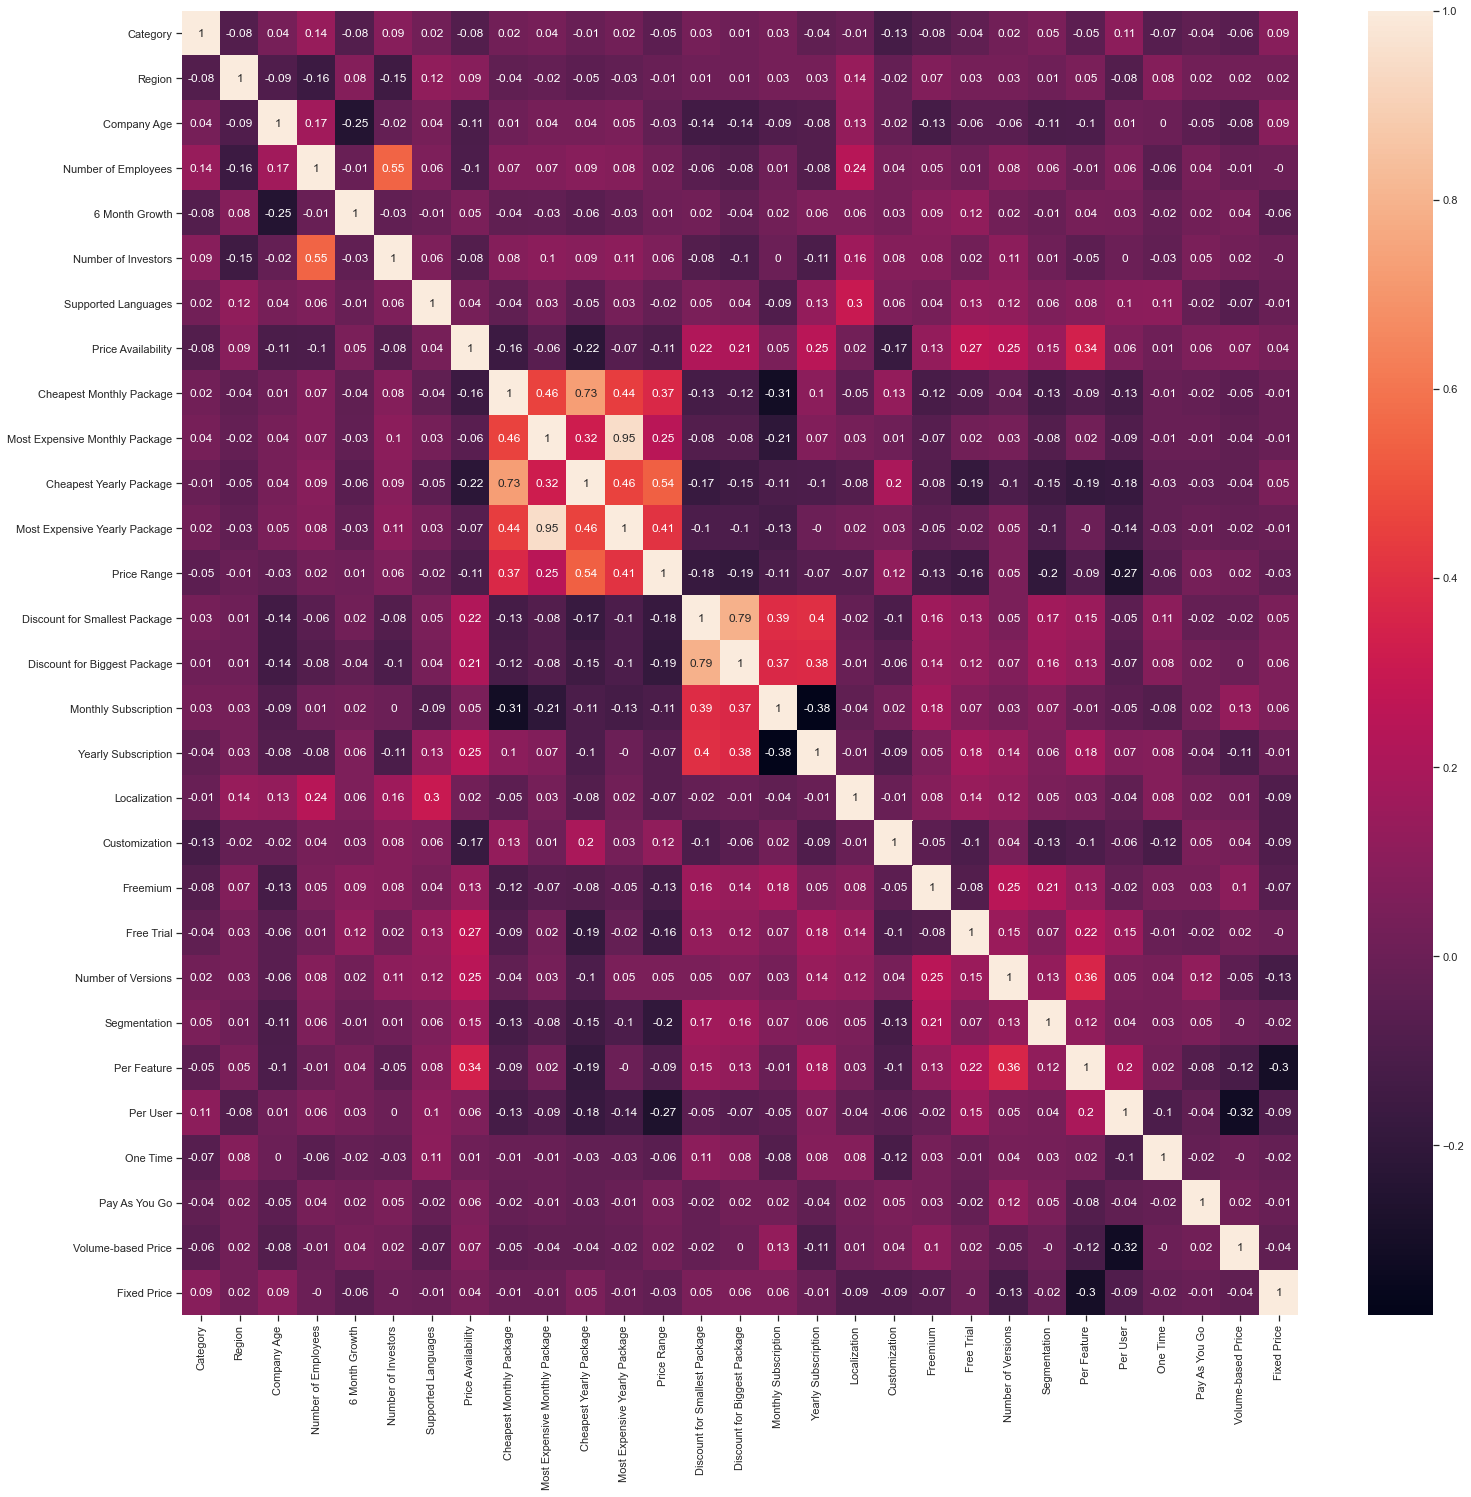

In [194]:
correlation_matrix = df.corr().round(2)

fig, ax = plt.subplots(figsize=(25,24)) 
sns.heatmap(data=correlation_matrix, annot=True)

correlation_matrix = df.corr(method='spearman').round(2)

fig, ax = plt.subplots(figsize=(25,24)) 
sns.heatmap(data=correlation_matrix, annot=True)

<AxesSubplot:>

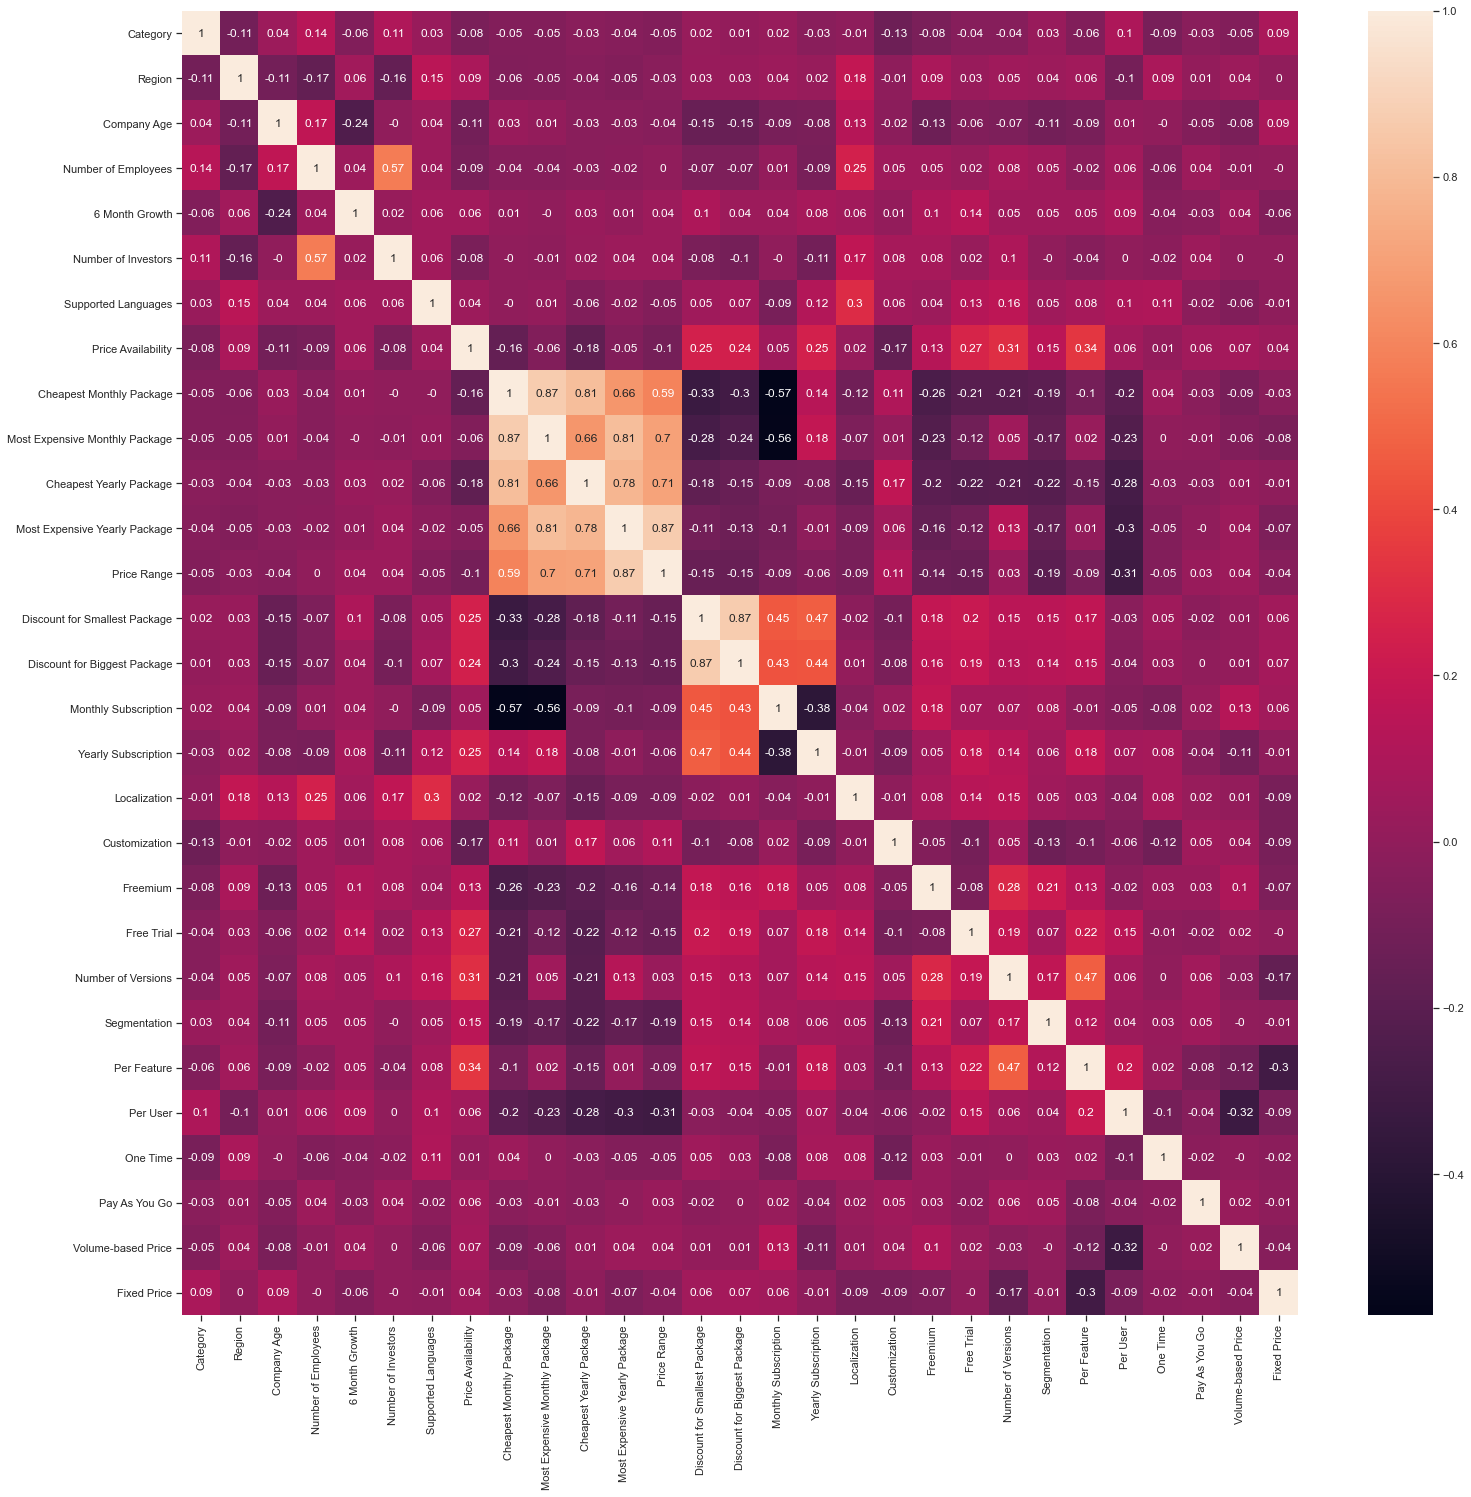

In [195]:
correlation_matrix = df.corr(method='spearman').round(2)

fig, ax = plt.subplots(figsize=(25,24)) 
sns.heatmap(data=correlation_matrix, annot=True)

In [196]:
from sklearn import preprocessing
import pandas as pd

df_norm = df[['Category', 'Region','Company Age','Number of Employees', '6 Month Growth', 'Number of Investors', 'Supported Languages','Price Availability','Cheapest Monthly Package','Most Expensive Monthly Package','Cheapest Yearly Package','Price Range','Most Expensive Yearly Package','Discount for Smallest Package','Discount for Biggest Package','Monthly Subscription','Yearly Subscription','Localization','Customization', 'Freemium', 'Free Trial', 'Number of Versions','Segmentation', 'Per Feature', 'Per User', 'One Time', 'Pay As You Go', 'Volume-based Price', 'Fixed Price']]
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

names = df_norm.columns
d = scaler.fit_transform(df_norm)

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,Category,Region,Company Age,Number of Employees,6 Month Growth,Number of Investors,Supported Languages,Price Availability,Cheapest Monthly Package,Most Expensive Monthly Package,...,Freemium,Free Trial,Number of Versions,Segmentation,Per Feature,Per User,One Time,Pay As You Go,Volume-based Price,Fixed Price
0,0.714286,1.0,0.5,0.5,1.000000,0.5,0.0,1.0,0.001255,0.000780,...,0.0,1.0,0.157895,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.142857,0.0,1.0,0.5,0.775233,0.0,0.0,1.0,0.000920,0.002497,...,1.0,1.0,0.473684,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.142857,0.5,0.0,0.0,0.775233,0.0,1.0,1.0,0.001825,0.000226,...,1.0,1.0,0.105263,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.714286,0.0,0.0,0.0,0.602907,0.0,0.0,1.0,0.001590,0.000238,...,0.0,1.0,0.105263,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.285714,0.5,0.0,1.0,0.596395,1.0,0.5,1.0,0.000250,0.000051,...,1.0,1.0,0.105263,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [133]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [197]:
df_marks= df[['Name']]
rez = pd.concat([df_marks,scaled_df],axis=1)
rez.head()


,Name,Category,Region,Company Age,Number of Employees,6 Month Growth,Number of Investors,Supported Languages,Price Availability,Cheapest Monthly Package,...,Freemium,Free Trial,Number of Versions,Segmentation,Per Feature,Per User,One Time,Pay As You Go,Volume-based Price,Fixed Price
0,Practice Ignition,0.714286,1.0,0.5,0.5,1.000000,0.5,0.0,1.0,0.001255,...,0.0,1.0,0.157895,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,SketchUp,0.142857,0.0,1.0,0.5,0.775233,0.0,0.0,1.0,0.000920,...,1.0,1.0,0.473684,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Livestorm,0.142857,0.5,0.0,0.0,0.775233,0.0,1.0,1.0,0.001825,...,1.0,1.0,0.105263,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Crelate Talent,0.714286,0.0,0.0,0.0,0.602907,0.0,0.0,1.0,0.001590,...,0.0,1.0,0.105263,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,TravelPerk,0.285714,0.5,0.0,1.0,0.596395,1.0,0.5,1.0,0.000250,...,1.0,1.0,0.105263,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [184]:
# create kmeans object
kmeans = KMeans(n_clusters=2)
# fit kmeans object to data
kmeans.fit(scaled_df)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
X = kmeans.cluster_centers_
y_km = kmeans.fit_predict(scaled_df)
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

[[0.49385908 0.09728507 0.47285068 0.61538462 0.12216879 0.34162896
  0.23755656 0.73303167 0.03559224 0.01136971 0.07389523 0.44042232
  0.02192163 0.05766156 0.05439639 0.75565611 0.52488688 0.31674208
  0.83710407 0.27149321 0.44343891 0.1283639  0.1561086  0.76923077
  0.12669683 0.02262443 0.02714932 0.26696833 0.00904977]
 [0.52954145 0.12808642 0.46141975 0.56944444 0.12131783 0.20679012
  0.4382716  0.9382716  0.00302097 0.00467621 0.00849247 0.13477366
  0.00783133 0.13982489 0.13617244 0.71604938 0.85185185 0.49074074
  0.44444444 0.33024691 0.84567901 0.16098116 0.43981481 0.97530864
  0.65432099 0.0308642  0.01234568 0.04938272 0.01234568]]


In [ ]:
##Calinski-Harabasz Index

In [185]:
from sklearn.metrics.cluster import calinski_harabasz_score
calinski_harabasz_score(scaled_df, labels)

53.822584893604905

In [186]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_df)
print(kmeans.cluster_centers_)
X = kmeans.cluster_centers_
y_km = kmeans.fit_predict(scaled_df)
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

[[ 5.25641026e-01  1.53846154e-01  4.77564103e-01  7.08333333e-01
   1.40583631e-01  3.62179487e-01  5.89743590e-01  9.55128205e-01
   2.08658440e-03  1.21159953e-03  7.81123171e-03  1.26068376e-01
   4.90798756e-03  1.57401013e-01  1.48940585e-01  8.14102564e-01
   8.07692308e-01  9.67948718e-01  5.25641026e-01  4.67948718e-01
   9.03846154e-01  1.87584345e-01  4.74358974e-01  9.80769231e-01
   5.12820513e-01  4.48717949e-02  1.28205128e-02  1.15384615e-01
   0.00000000e+00]
 [ 4.94505495e-01  1.06837607e-01  5.08547009e-01  5.17094017e-01
   1.14110515e-01  1.96581197e-01  3.46153846e-01  8.20512821e-01
   6.52645355e-02  3.05927697e-02  6.49153347e-02  3.76068376e-01
   3.05900634e-02 -6.93889390e-17 -8.32667268e-17  2.22044605e-16
   1.00000000e+00  3.33333333e-01  6.23931624e-01  1.11111111e-01
   5.38461538e-01  1.24606388e-01  1.45299145e-01  8.80341880e-01
   4.61538462e-01  4.27350427e-02  1.70940171e-02  5.98290598e-02
  -1.73472348e-18]
 [ 5.00438212e-01  1.13496933e-01  3.7

In [187]:
from sklearn.metrics.cluster import calinski_harabasz_score
calinski_harabasz_score(scaled_df, labels)

45.15317033987041

In [198]:
rez.head()

,Name,Category,Region,Company Age,Number of Employees,6 Month Growth,Number of Investors,Supported Languages,Price Availability,Cheapest Monthly Package,...,Freemium,Free Trial,Number of Versions,Segmentation,Per Feature,Per User,One Time,Pay As You Go,Volume-based Price,Fixed Price
0,Practice Ignition,0.714286,1.0,0.5,0.5,1.000000,0.5,0.0,1.0,0.001255,...,0.0,1.0,0.157895,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,SketchUp,0.142857,0.0,1.0,0.5,0.775233,0.0,0.0,1.0,0.000920,...,1.0,1.0,0.473684,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Livestorm,0.142857,0.5,0.0,0.0,0.775233,0.0,1.0,1.0,0.001825,...,1.0,1.0,0.105263,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Crelate Talent,0.714286,0.0,0.0,0.0,0.602907,0.0,0.0,1.0,0.001590,...,0.0,1.0,0.105263,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,TravelPerk,0.285714,0.5,0.0,1.0,0.596395,1.0,0.5,1.0,0.000250,...,1.0,1.0,0.105263,0.0,1.0,0.0,1.0,0.0,1.0,0.0


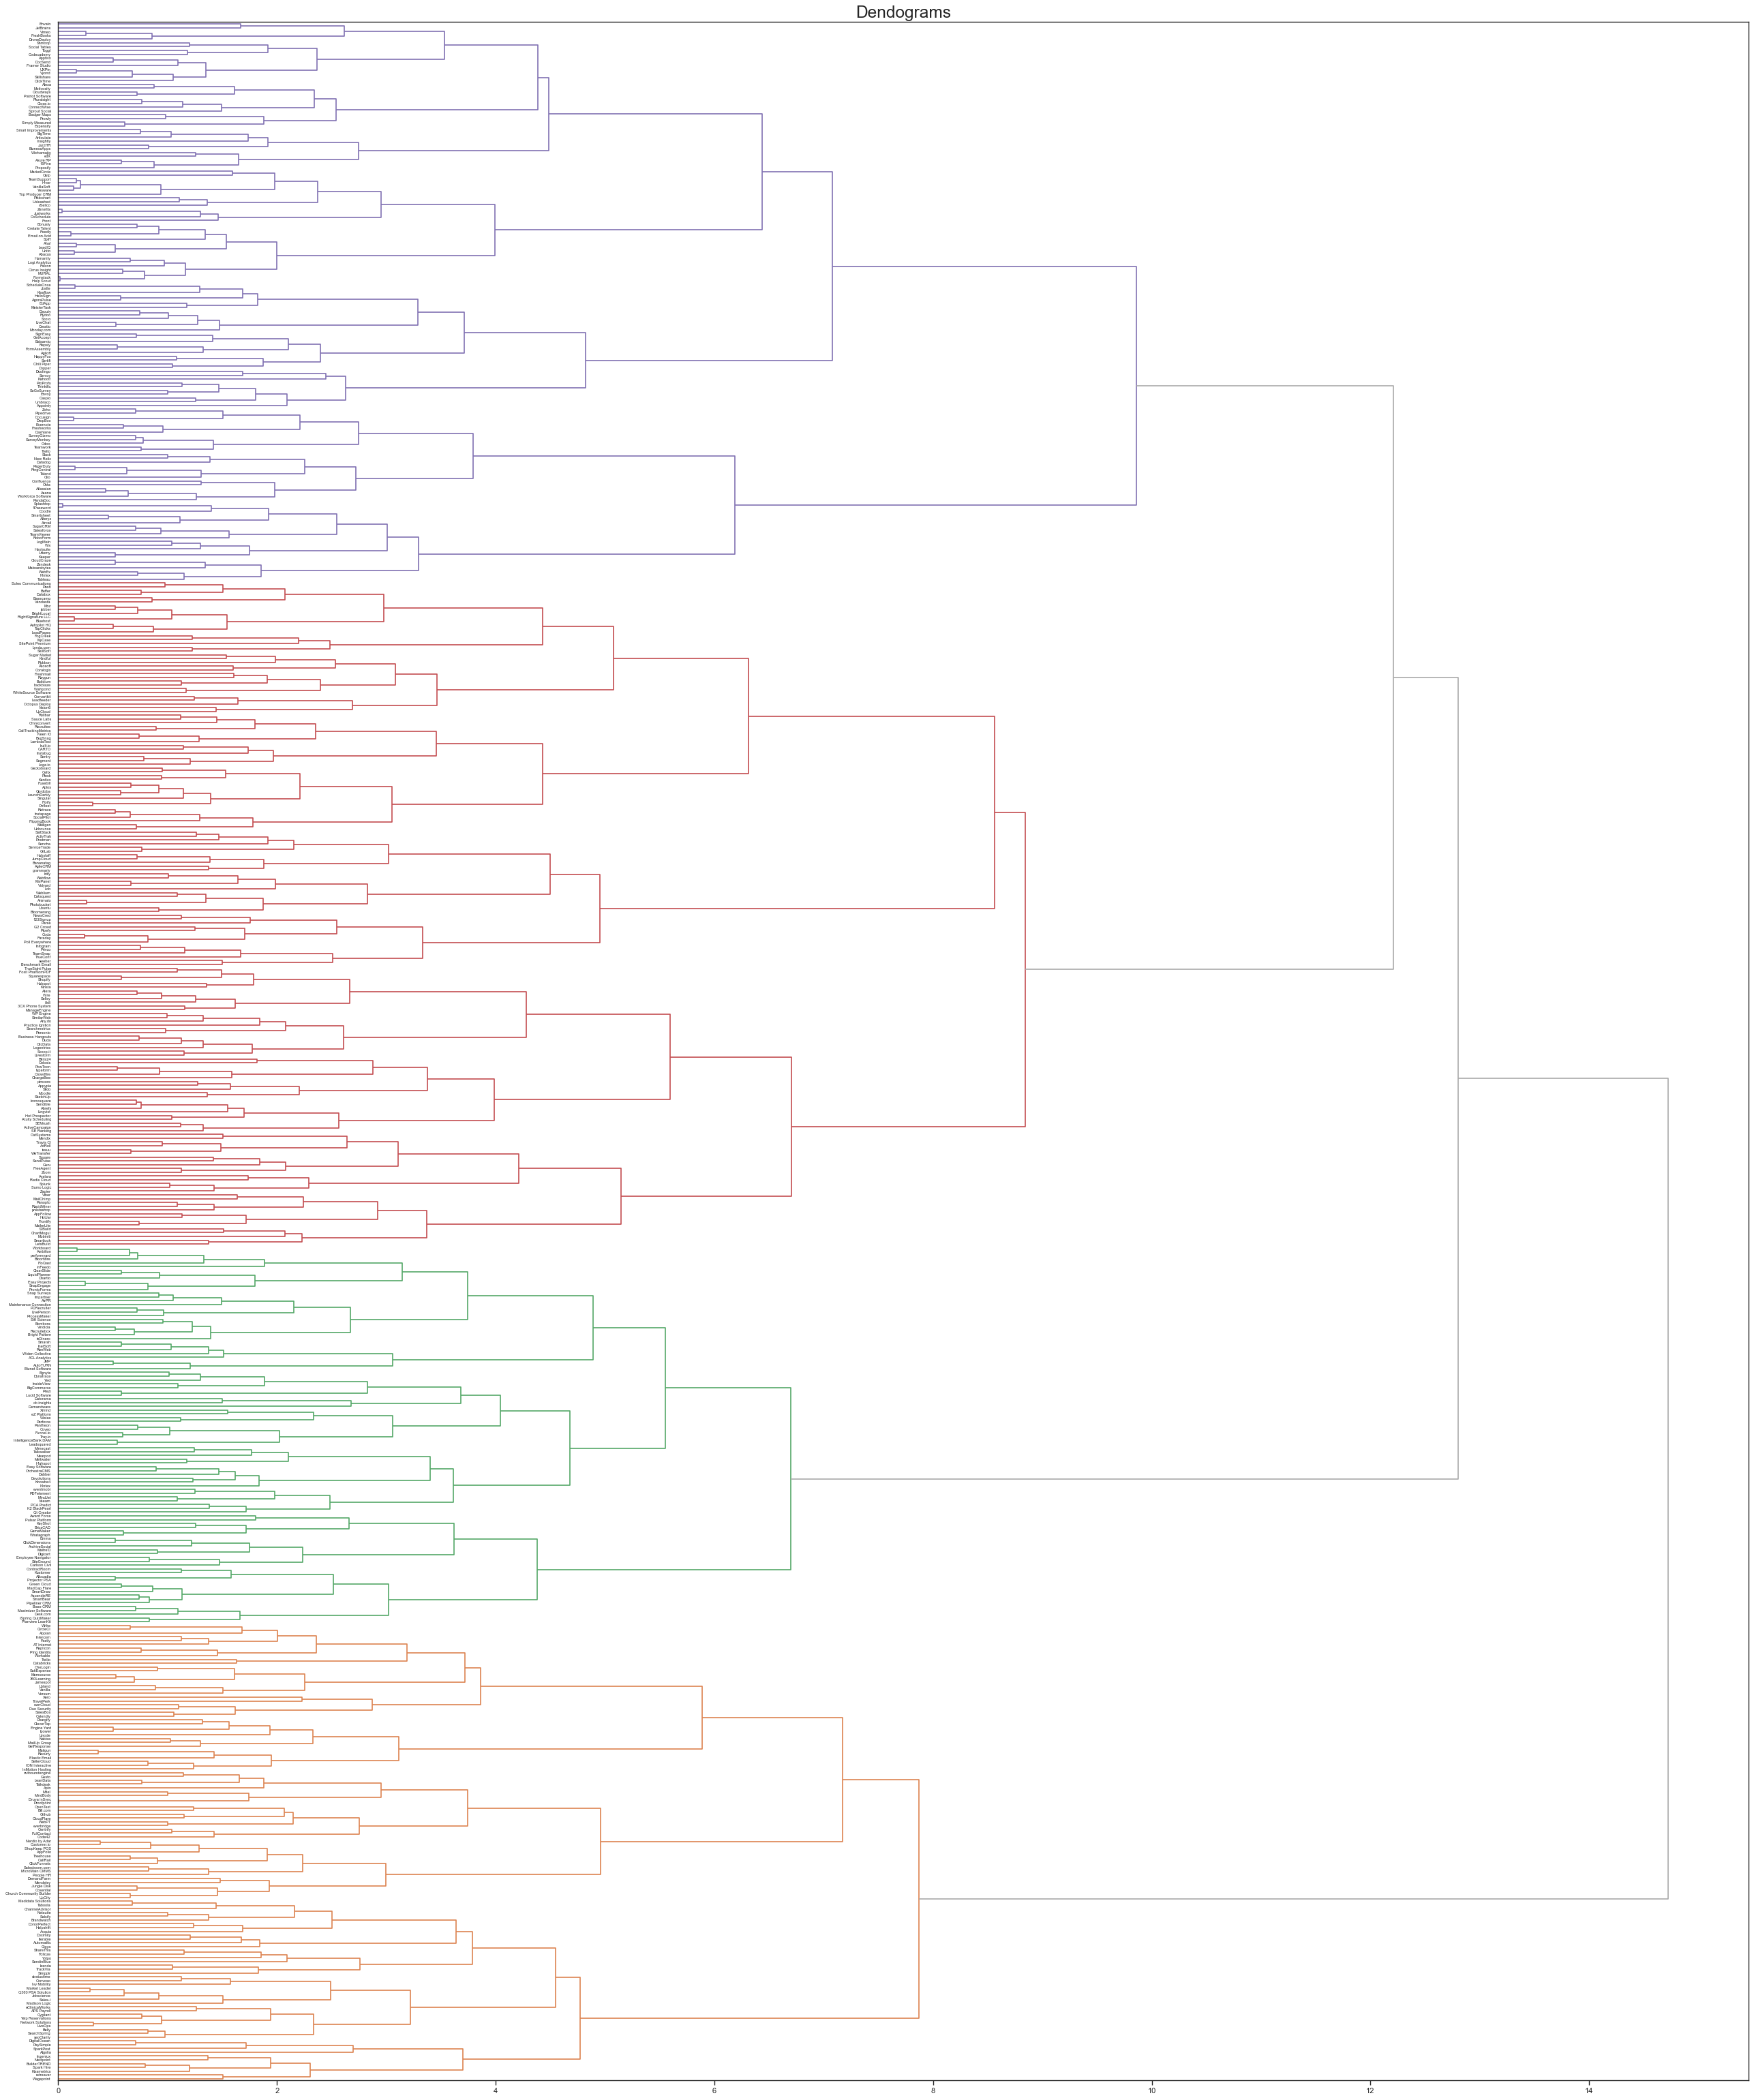

In [151]:
import scipy.cluster.hierarchy as shc
# Plot
plt.figure(figsize=(40, 50), dpi= 80)  
plt.title("Dendograms", fontsize=22)  
dend = shc.dendrogram(shc.linkage(rez[['Category', 'Region','Company Age','Number of Employees', '6 Month Growth', 'Number of investors', 'Supported Languages','Cheapest Monthly Package','Most Expensive Monthly Package','Average Monthly Package','Cheapest Yearly Package','Most Expensive Yearly Package','Average Yearly Package','Month subscription','Year subscription','Price Localization','Custom Pricing', 'Freemium', 'Free Trial', 'Number of Versions','Segmentation', 'per_feature', 'per_user', 'one_time', 'pay_as_you_go', 'volume-based', 'fixed']], method='ward'),orientation='right', labels=rez.Name.values, above_threshold_color='#AAA')  
plt.xticks(fontsize=10)
plt.show()

In [176]:
shc.is_valid_linkage(dend, )

False

In [172]:
k_inertia = []
ks = range(1,21)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(scaled_df, )
    k_inertia.append(clf_kmeans.inertia_)

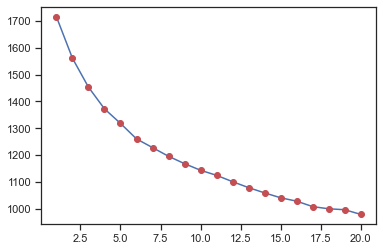

In [169]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

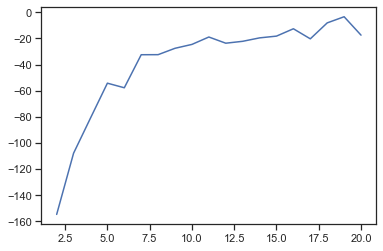

In [170]:
diff = np.diff(k_inertia)
plt.plot(ks[1:], diff)

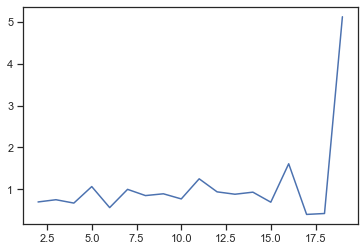

In [173]:
diff_r = diff[1:] / diff[:-1]
plt.plot(ks[1:-1], diff_r)

In [171]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

2